In [1]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
import pandas as pd
df=pd.read_csv('loan_data_9578.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
#df['education'] = df['education'].str.strip()
#df['self_employed'] = df['self_employed'].str.strip()
#df['loan_status'] = df['loan_status'].str.strip()
#df.drop(columns=['loan_id'], inplace=True)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [4]:
# Convert 'credit.policy' and 'not.fully.paid' columns to boolean type
#df['credit.policy'] = df['credit.policy'].astype(bool)
#df['not.fully.paid'] = df['not.fully.paid'].astype(bool)
# Verify the changes
#print(df[['credit.policy', 'not.fully.paid']].dtypes)

In [5]:
# List of features to analyze
features_to_analyze = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Loop through each feature
for feature in features_to_analyze:
    # Get unique values and their counts
    unique_values_counts = df[feature].value_counts()

    # Calculate the percentage per unique value
    percentages = (unique_values_counts / unique_values_counts.sum()) * 100

    # Sort the unique values in ascending order
    unique_values_counts = unique_values_counts.sort_index()
    percentages = percentages.sort_index()

    # Print the results
    print(f"Feature: {feature}")
    print("Unique Values\tCounts\tPercentage")
    for value, count, percentage in zip(unique_values_counts.index, unique_values_counts, percentages):
        print(f"{value}\t\t{count}\t\t{percentage:.2f}%")
    print("\n")

Feature: inq.last.6mths
Unique Values	Counts	Percentage
0		3637		37.97%
1		2462		25.70%
2		1384		14.45%
3		864		9.02%
4		475		4.96%
5		278		2.90%
6		165		1.72%
7		100		1.04%
8		72		0.75%
9		47		0.49%
10		23		0.24%
11		15		0.16%
12		15		0.16%
13		6		0.06%
14		6		0.06%
15		9		0.09%
16		3		0.03%
17		2		0.02%
18		4		0.04%
19		2		0.02%
20		1		0.01%
24		2		0.02%
25		1		0.01%
27		1		0.01%
28		1		0.01%
31		1		0.01%
32		1		0.01%
33		1		0.01%


Feature: delinq.2yrs
Unique Values	Counts	Percentage
0		8458		88.31%
1		832		8.69%
2		192		2.00%
3		65		0.68%
4		19		0.20%
5		6		0.06%
6		2		0.02%
7		1		0.01%
8		1		0.01%
11		1		0.01%
13		1		0.01%


Feature: pub.rec
Unique Values	Counts	Percentage
0		9019		94.16%
1		533		5.56%
2		19		0.20%
3		5		0.05%
4		1		0.01%
5		1		0.01%




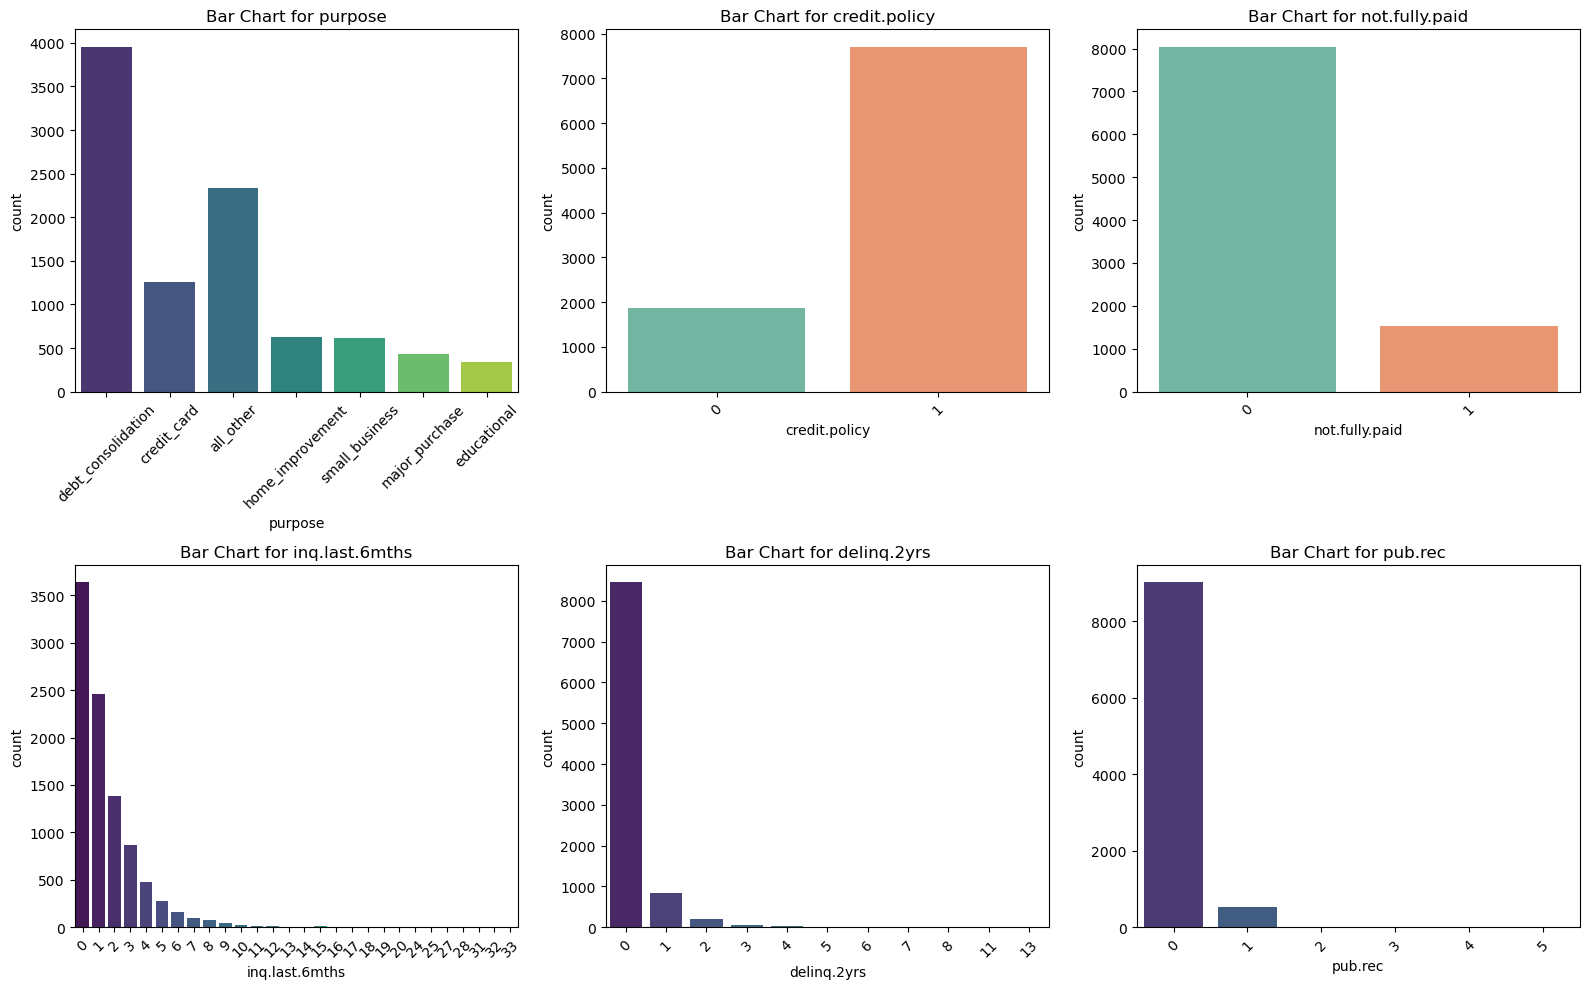

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features (including boolean features)
categorical_features = ['purpose', 'credit.policy', 'not.fully.paid', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
#categorical_features = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Create subplots for each categorical feature
plt.figure(figsize=(16, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    plt.title(f'Bar Chart for {feature}')
    
    if feature in ['credit.policy', 'not.fully.paid']:
        sns.countplot(data=df, x=feature, palette='Set2')
    else:
        sns.countplot(data=df, x=feature, palette='viridis')
    
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['purpose'] = label_encoder.fit_transform(df['purpose'])

# Apply label encoding to the 'self_employed' column
#df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
#df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1,0])

# Apply label encoding to the 'loan_status' column
#df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
#df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1,0])

# Display the updated DataFrame with encoded columns
print(df[['purpose']])

      purpose
0           2
1           1
2           2
3           2
4           1
...       ...
9573        0
9574        0
9575        2
9576        4
9577        2

[9578 rows x 1 columns]


In [8]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [9]:
import numpy as np
class WOE_Encoder():
    def __init__(self, cols=None, size=None):
            self.cols = cols
            self.min_samples=1
            #self.bins=10000
            self.bins=int(size/10)
            self._mapping = {}
            
    def WOE_fit(self, X, y):
        for col in self.cols:
            X[col]=X[col].fillna(-9999)
            if (len(np.unique(X[col]))>100):
                binned_x = pd.qcut(X[col], self.bins,  duplicates='drop')
                d0 = pd.DataFrame({'x': binned_x, 'y':y})
            else:
                d0 = pd.DataFrame({'x': X[col], 'y': y})
            #print (d0)
            # Share of positive (resp. negative) labels for each category P(X=X_i | Y=1) (resp. P(X=X_i | Y=0))
            #mapping = y.groupby(X[col]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping = y.groupby(d0["x"]).agg(['sum', 'count']).rename({'sum': 'pos'}, axis=1)
            mapping['neg'] = mapping['count'] - mapping['pos']
            mapping[['pos', 'neg']] /= mapping[['pos', 'neg']].sum()
            # For corner cases, defaulting to WOE = 0 (meaning no info). To avoid division by 0 we use default values.
            undef = (mapping['count'] < self.min_samples) | (mapping['pos'] == 0) | (mapping['neg'] == 0)
            mapping.loc[undef, ['pos', 'neg']] = -1
            # Final step, log of ratio of probabily estimates
            mapping['value'] = np.log((mapping['pos'] +0.0001)/ (mapping['neg']+0.0001))
            self._mapping[col] = mapping
            

        X_encoded = X.copy(deep=True)
        for col, mapping in self._mapping.items():
            X_encoded.loc[:, col] = X_encoded[col].fillna(-9999).map(mapping['value'])
            X_encoded[col].fillna(0, inplace=True)
             
        return X_encoded 

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the feature columns (X) and target column (y)
y = df['not.fully.paid']  # Target variable
x = df.drop(columns=['not.fully.paid'])  # Drop 'loan_status' column to get feature columns


# Select only the numerical columns for scaling (excluding 'loan_status')
#numerical_columns = [ 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
#                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
#                      'bank_asset_value']

numerical_columns = [ 'int.rate', 'installment', 'log.annual.inc', 'dti',
                      'fico', 'days.with.cr.line', 'revol.bal',
                      'revol.util']

 
    
    
    
    
    
    
    

# Apply scaling to the numerical columns
#x[numerical_columns] = scaler.fit_transform(x[numerical_columns])


# Display the scaled feature variables (X) and the target variable (y)
#print("Scaled Feature Variables (x):")
#print(x.head())

#from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

#enc = WeightOfEvidenceEncoder(cols=numerical_columns)
#x[numerical_columns] = enc.fit_transform(x[numerical_columns], y)
#x.head()


Obj = WOE_Encoder(cols=numerical_columns, size=x[numerical_columns].shape[0])
x[numerical_columns] = Obj.WOE_fit(x[numerical_columns], y)

# Display the scaled feature variables (X) and the target variable (y)
print("aWOE Feature Variables (x):")
print(x.head())

C:\Users\Joy\AppData\Local\Temp\ipykernel_12708\2060741181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].fillna(-9999)
C:\Users\Joy\AppData\Local\Temp\ipykernel_12708\2060741181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].fillna(-9999)
C:\Users\Joy\AppData\Local\Temp\ipykernel_12708\2060741181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

aWOE Feature Variables (x):
   credit.policy  purpose  int.rate  installment  log.annual.inc       dti  \
0              1        2 -0.161515     0.230899       -0.154453  0.141984   
1              1        1  0.410115     0.000000       -0.286081 -0.579511   
2              1        2 -0.227686     0.751573        0.249563  0.631011   
3              1        2  0.267251     0.249563       -0.154453  0.044863   
4              1        1  0.099015     0.249563        0.181279  0.256477   

       fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  0.021241           0.666192   0.751573    0.631011               0   
1  0.032013          -0.374811   0.249563   -0.482390               0   
2  0.070486          -1.488118   0.000000   -1.133645               1   
3 -0.121862          -1.133645   0.249563    0.631011               1   
4  0.464796           0.418010   0.141984    0.249563               0   

   delinq.2yrs  pub.rec  
0            0        0  
1           

C:\Users\Joy\AppData\Local\Temp\ipykernel_12708\2060741181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].fillna(-9999)


In [11]:
x

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,-0.161515,0.230899,-0.154453,0.141984,0.021241,0.666192,0.751573,0.631011,0,0,0
1,1,1,0.410115,0.000000,-0.286081,-0.579511,0.032013,-0.374811,0.249563,-0.482390,0,0,0
2,1,2,-0.227686,0.751573,0.249563,0.631011,0.070486,-1.488118,0.000000,-1.133645,1,0,0
3,1,2,0.267251,0.249563,-0.154453,0.044863,-0.121862,-1.133645,0.249563,0.631011,1,0,0
4,1,1,0.099015,0.249563,0.181279,0.256477,0.464796,0.418010,0.141984,0.249563,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.058482,-0.124971,0.455029,0.906464,0.317641,-0.482390,1.538828,0.141984,2,0,0
9574,0,0,-0.101076,0.751573,0.488904,-0.374811,-0.207491,0.114281,0.041818,0.531931,5,0,0
9575,0,2,0.410115,0.751573,0.037475,-0.200169,0.145678,0.046558,-0.482390,0.917499,8,0,0
9576,0,4,0.259759,0.249563,-0.097198,1.242761,0.004361,0.519813,0.166546,1.164143,5,0,0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

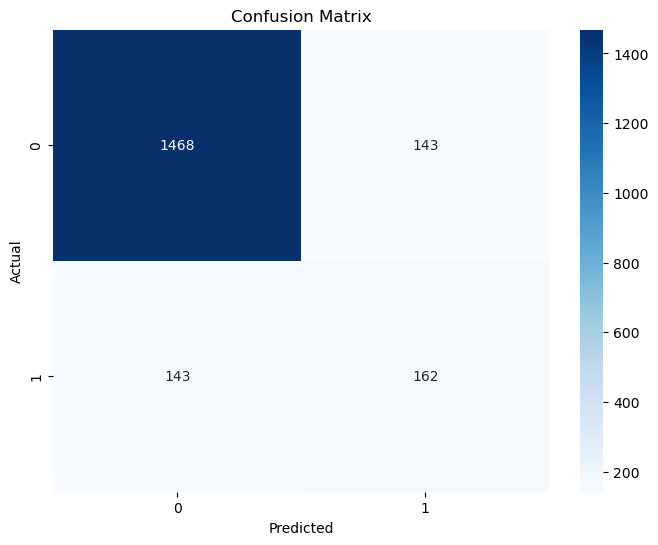

GaussianNB Classifier Metrics:
Accuracy: 0.8507306889352818
Precision: 0.8507306889352818
Recall: 0.8507306889352818
F1 Score: 0.8507306889352818
GaussianNB Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1611
           1       0.53      0.53      0.53       305

    accuracy                           0.85      1916
   macro avg       0.72      0.72      0.72      1916
weighted avg       0.85      0.85      0.85      1916



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GaussianNB instance
gaussian_nb = GaussianNB()

# Train the logistic regression model
gaussian_nb.fit(x_train, y_train)

# Predict on the test set
y_pred = gaussian_nb.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("GaussianNB Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("GaussianNB Report:\n", classification_rep)

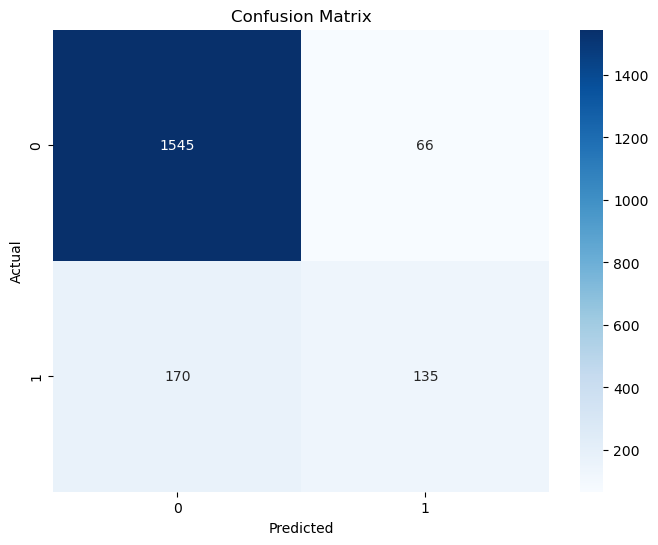

LogisticRegression Classifier Metrics:
Accuracy: 0.8768267223382046
Precision: 0.8643840209653085
Recall: 0.8768267223382046
F1 Score: 0.8660943387011246
LogisticRegression Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1611
           1       0.67      0.44      0.53       305

    accuracy                           0.88      1916
   macro avg       0.79      0.70      0.73      1916
weighted avg       0.86      0.88      0.87      1916



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LogisticRegression Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("LogisticRegression Report:\n", classification_rep)

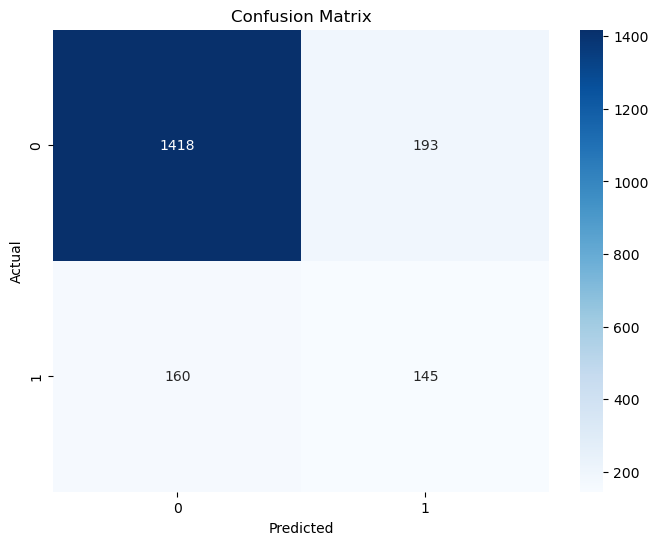

Decision Tree Classifier Metrics:
Accuracy: 0.8157620041753654
Precision: 0.8238503067127919
Recall: 0.8157620041753654
F1 Score: 0.8195364748195446
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1611
           1       0.43      0.48      0.45       305

    accuracy                           0.82      1916
   macro avg       0.66      0.68      0.67      1916
weighted avg       0.82      0.82      0.82      1916



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

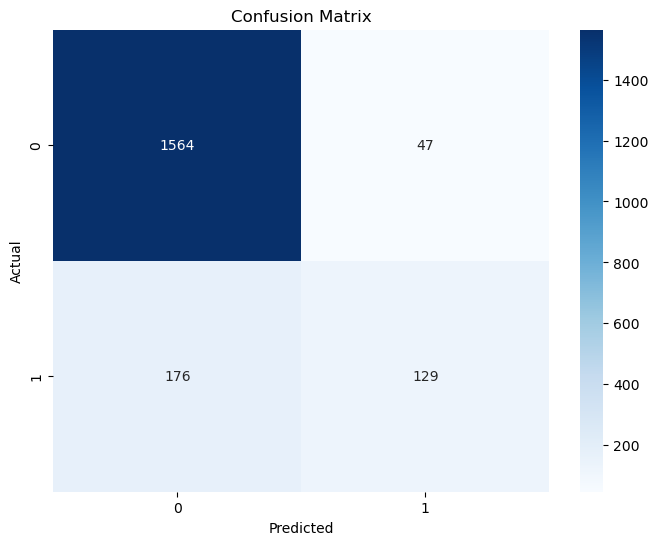

Random Forest Classifier Metrics:
Accuracy: 0.8836116910229646
Precision: 0.872442281954961
Recall: 0.8836116910229646
F1 Score: 0.8702447674334046
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1611
           1       0.73      0.42      0.54       305

    accuracy                           0.88      1916
   macro avg       0.82      0.70      0.73      1916
weighted avg       0.87      0.88      0.87      1916



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

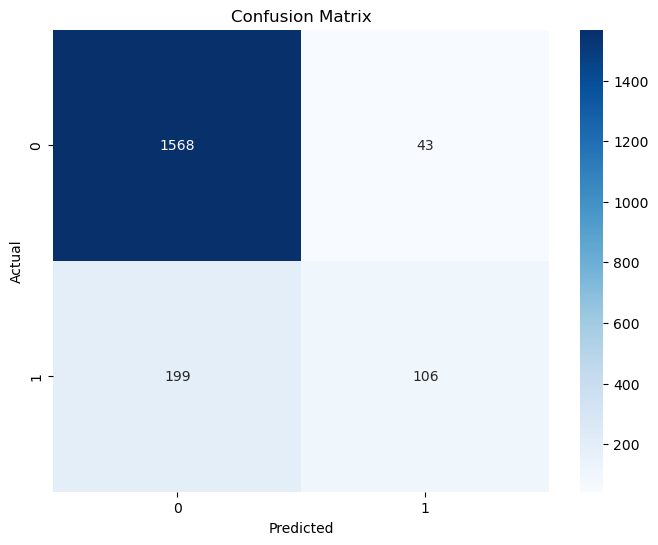

SVM Classifier Metrics:
Accuracy: 0.8736951983298539
Precision: 0.8593677590725561
Recall: 0.8736951983298539
F1 Score: 0.854911706334151
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1611
           1       0.71      0.35      0.47       305

    accuracy                           0.87      1916
   macro avg       0.80      0.66      0.70      1916
weighted avg       0.86      0.87      0.85      1916



In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

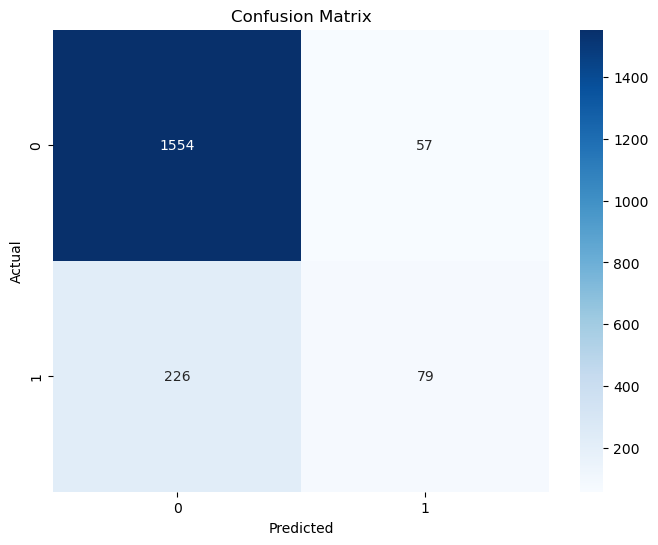

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.8522964509394572
Precision: 0.8265273596126541
Recall: 0.8522964509394572
F1 Score: 0.8276755876618691
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1611
           1       0.58      0.26      0.36       305

    accuracy                           0.85      1916
   macro avg       0.73      0.61      0.64      1916
weighted avg       0.83      0.85      0.83      1916



In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

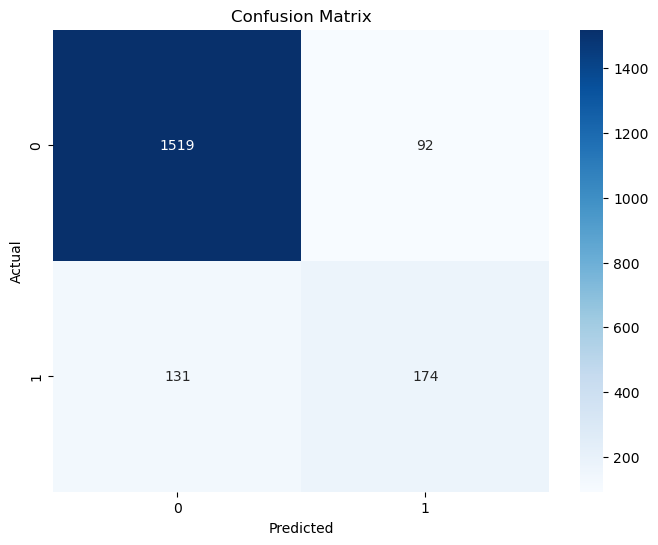

XGBoost Classifier Metrics:
Accuracy: 0.8836116910229646
Precision: 0.8781877045051423
Recall: 0.8836116910229646
F1 Score: 0.8803329331787662
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1611
           1       0.65      0.57      0.61       305

    accuracy                           0.88      1916
   macro avg       0.79      0.76      0.77      1916
weighted avg       0.88      0.88      0.88      1916



In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/30
192/192 [==============================] - 2s 4ms/step - loss: 0.3925 - accuracy: 0.8460 - val_loss: 0.3379 - val_accuracy: 0.8669
Epoch 2/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8633 - val_loss: 0.3202 - val_accuracy: 0.8702
Epoch 3/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.8691 - val_loss: 0.3136 - val_accuracy: 0.8774
Epoch 4/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.8747 - val_loss: 0.2993 - val_accuracy: 0.8839
Epoch 5/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8770 - val_loss: 0.3011 - val_accuracy: 0.8819
Epoch 6/30
192/192 [==============================] - 1s 3ms/step - loss: 0.3011 - accuracy: 0.8778 - val_loss: 0.2949 - val_accuracy: 0.8839
Epoch 7/30
192/192 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.8798 - val_loss: 0.2979 - val_accuracy: 0.8852
Epoch 

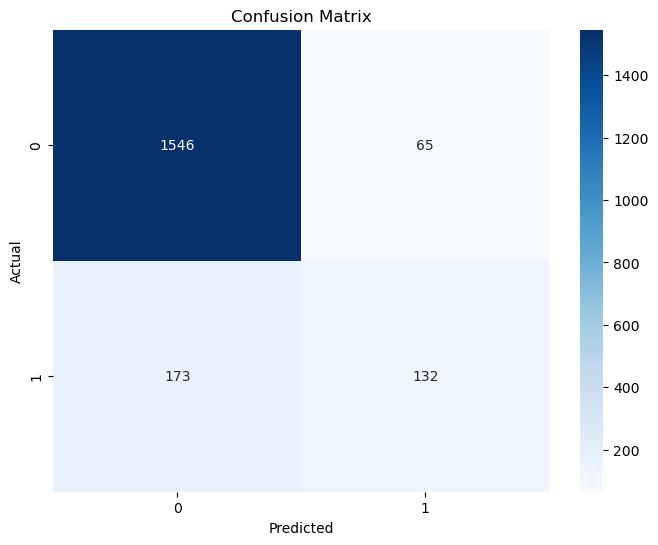

FNN Classifier Metrics:
Accuracy: 0.8757828810020877
Precision: 0.8628573028085315
Recall: 0.8757828810020877
F1 Score: 0.8644352118131323
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1611
           1       0.67      0.43      0.53       305

    accuracy                           0.88      1916
   macro avg       0.78      0.70      0.73      1916
weighted avg       0.86      0.88      0.86      1916



In [20]:
#FNN
 
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#create model

#x_train, x_test, y_train, y_test 

model = Sequential()
#get number of columns in training data
n_cols = x_test.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#compile model using mse as a measure of model performance
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
 
model.fit(x_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("FNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/100
240/240 [==============================] - 5s 8ms/step - loss: 0.3548
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1854
Epoch 3/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1415
Epoch 4/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1160
Epoch 5/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1059
Epoch 6/100
240/240 [==============================] - 2s 8ms/step - loss: 0.1013
Epoch 7/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0987
Epoch 8/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0976
Epoch 9/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0974
Epoch 10/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0959
Epoch 11/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0947
Epoch 12/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0944
Epoch 13/100


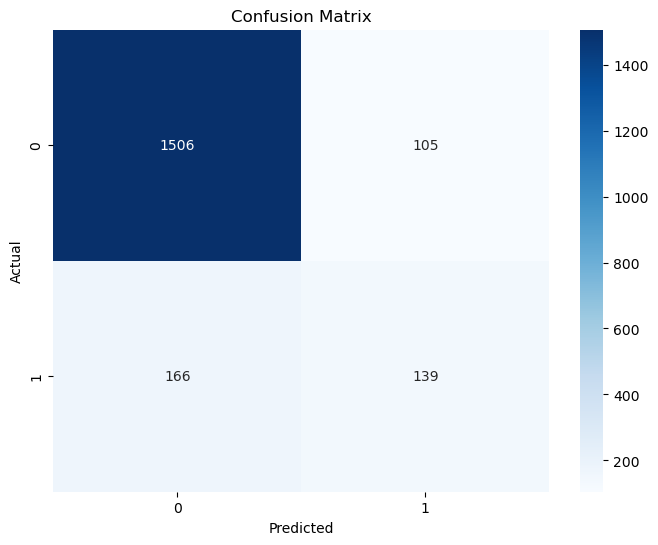

RNN Classifier Metrics:
Accuracy: 0.8585594989561587
Precision: 0.8480199478578777
Recall: 0.8585594989561587
F1 Score: 0.8520157156642193
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1611
           1       0.57      0.46      0.51       305

    accuracy                           0.86      1916
   macro avg       0.74      0.70      0.71      1916
weighted avg       0.85      0.86      0.85      1916



In [21]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Predict on the test set
y_pred = model.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("RNN Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

Epoch 1/50
240/240 [==============================] - 24s 24ms/step - loss: 0.1115
Epoch 2/50
240/240 [==============================] - 6s 24ms/step - loss: 0.1018
Epoch 3/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0997
Epoch 4/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0992
Epoch 5/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0980
Epoch 6/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0979
Epoch 7/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0978
Epoch 8/50
240/240 [==============================] - 6s 23ms/step - loss: 0.0967
Epoch 9/50
240/240 [==============================] - 6s 23ms/step - loss: 0.0963
Epoch 10/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0968
Epoch 11/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0961
Epoch 12/50
240/240 [==============================] - 6s 24ms/step - loss: 0.0966
Epoch 13/50


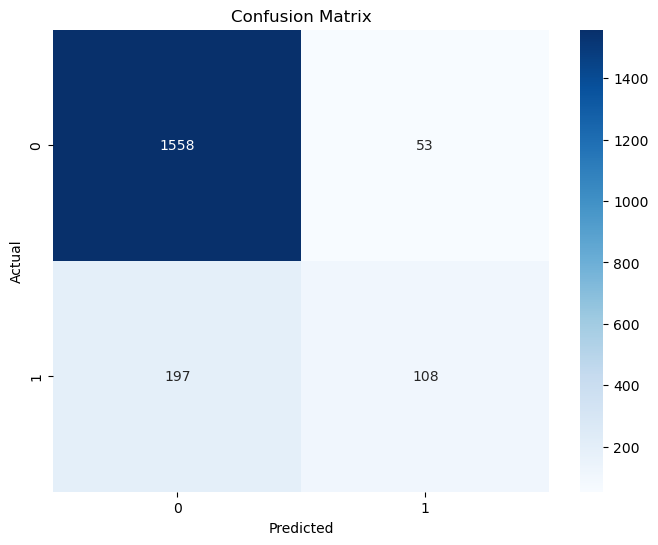

LSTM (beter version of RNN) Classifier Metrics:
Accuracy: 0.8695198329853863
Precision: 0.8532152274822692
Recall: 0.8695198329853863
F1 Score: 0.852150826795839
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1611
           1       0.67      0.35      0.46       305

    accuracy                           0.87      1916
   macro avg       0.78      0.66      0.69      1916
weighted avg       0.85      0.87      0.85      1916



In [22]:


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(x_train,y_train,epochs=50,batch_size=32)



  

# Predict on the test set
y_pred = regressor.predict(x_test)
y22_pred=y_pred.round()


# Calculate accuracy
accuracy = accuracy_score(y_test, y22_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y22_pred, average='weighted')
recall = recall_score(y_test, y22_pred, average='weighted')
f1 = f1_score(y_test, y22_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y22_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y22_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("LSTM (beter version of RNN) Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


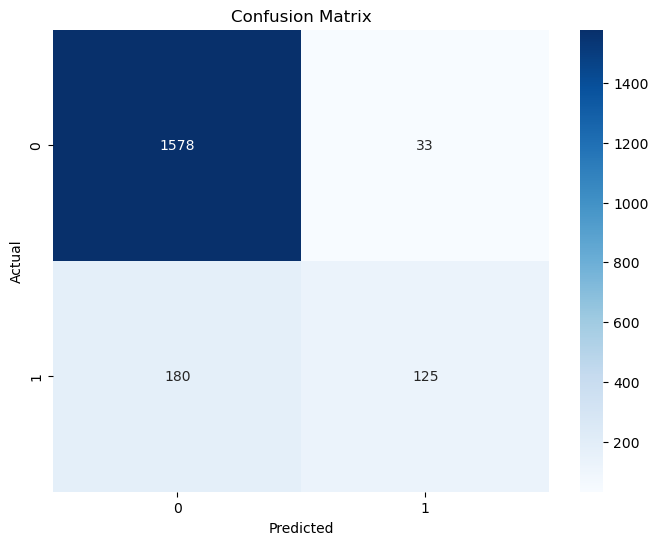

Ensemble Classifier Metrics:
Accuracy: 0.8888308977035491
Precision: 0.8806621413850102
Recall: 0.8888308977035491
F1 Score: 0.8736084305458078
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1611
           1       0.79      0.41      0.54       305

    accuracy                           0.89      1916
   macro avg       0.84      0.69      0.74      1916
weighted avg       0.88      0.89      0.87      1916



In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
gaussian_nb = GaussianNB()
logistic_reg = LogisticRegression(random_state=42)
svm_classifier = SVC(random_state=42)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    #('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier),
    ('logistic_reg', logistic_reg)
    #('gaussian_nb', gaussian_nb)
    #('svm_classifier', svm_classifier)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [24]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64